# From Linear Regression to Gradient Boosting for Revenue Prediction 📈

This notebook demonstrates how to build and compare three different regression models to predict `Revenue ($)` based on `Ad Spend ($)` and the `Season`. We will compare the performance of:

1.  **Linear Regression:** A simple, foundational model that assumes a linear relationship between features and the target.
2.  **Decision Tree Regressor:** A single non-linear model that makes predictions by splitting the data into branches based on feature values.
3.  **Gradient Boosting Regressor:** A powerful **ensemble** method. It works by building a series of simple decision trees **sequentially**, where each new tree is trained to correct the errors (or residuals) of the one before it. This step-by-step improvement process often leads to highly accurate models.

---

## 1. Exploring the Ad Spend Data

First, let's load our dataset and explore the relationships between the variables.


In [1]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('ad_spend.csv')
df.head()

,Ad Spend ($),Season,Revenue ($)
0,463,Monsoon,440
1,158,Winter,297
2,328,Monsoon,214
3,322,Monsoon,48
4,726,Winter,1048


We can group by `Season` to see the average Ad Spend and Revenue for each.

In [2]:
g = df.groupby("Season")[["Ad Spend ($)", "Revenue ($)"]].mean()
g

,Ad Spend ($),Revenue ($)
Season,,
Monsoon,517.643836,423.150685
Summer,573.836066,689.360656
Winter,552.560606,826.530303


Visualizing this helps to see the trends more clearly. The bar chart shows that average revenue is highest in Winter, even though ad spend is slightly higher in Summer.

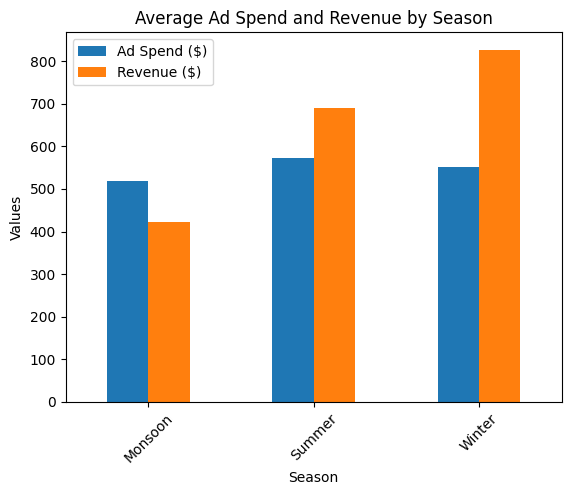

In [3]:
ax = g.plot(kind="bar")

ax.set_title('Average Ad Spend and Revenue by Season')
ax.set_xlabel('Season')
ax.set_ylabel('Values')

plt.xticks(rotation=45)
plt.show()

The scatter plot confirms that revenue generally increases with ad spend, but the trend seems to be different for each season, indicating that `Season` is an important predictive feature.

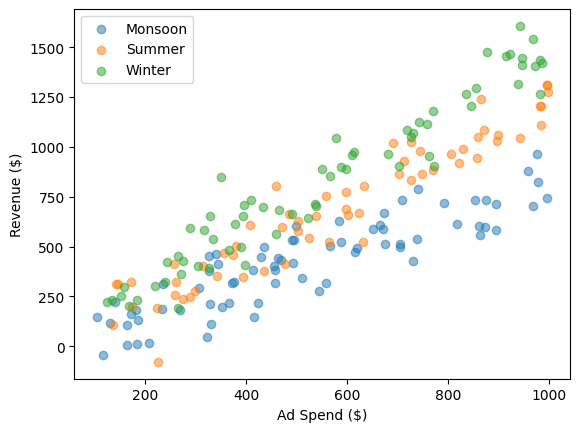

In [4]:
for season, subdf in df.groupby("Season"):
    plt.scatter(subdf["Ad Spend ($)"], subdf["Revenue ($)"], alpha=0.5, label=season)

plt.xlabel("Ad Spend ($)")
plt.ylabel("Revenue ($)")
plt.legend()
plt.show()

## 2. Preparing the Data for Modeling

Since `Season` is a categorical feature, we need to convert it into a numerical format using **One-Hot Encoding** before training our models.


In [5]:
df_encoded = pd.get_dummies(df, columns=["Season"], drop_first=True)
df_encoded.head()

,Ad Spend ($),Revenue ($),Season_Summer,Season_Winter
0,463,440,False,False
1,158,297,False,True
2,328,214,False,False
3,322,48,False,False
4,726,1048,False,True


Now, we split our encoded data into training and testing sets.

In [6]:
from sklearn.model_selection import train_test_split

X = df_encoded[["Ad Spend ($)", "Season_Summer", "Season_Winter"]]
y = df_encoded["Revenue ($)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

## 3. Comparing Model Performance

We will train and evaluate our three models using the **R-squared ($R^2$) score**, which measures how well the model's predictions approximate the real data points. An $R^2$ of 1 indicates a perfect fit.

### a) Baseline Model 1: Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
model_lr.score(X_test, y_test)

0.8882097000477289

The baseline Linear Regression model achieves an R² score of **88.8%**.

### b) Baseline Model 2: Decision Tree Regressor

In [11]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)
model_dt.score(X_test, y_test)

0.8972778553142061

The single Decision Tree performs slightly better, with an R² score of **89.7%**.


### c) Ensemble Model: Gradient Boosting Regressor

Now we'll use the Gradient Boosting ensemble method.

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

model_gbr = GradientBoostingRegressor()
model_gbr.fit(X_train, y_train)
model_gbr.score(X_test, y_test)

0.9149899654766234

The Gradient Boosting model achieves the highest score, with an R² of **91.5%**.

## 4. Analyzing the Gradient Boosting Model's Predictions

We can take a closer look at the predictions from our best model (Gradient Boosting) to see how they compare to the actual values on an individual basis.

In [13]:
y_pred = model_gbr.predict(X_test)

df_eval = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df_eval['Diff %'] = abs((df_eval['Predicted'] - df_eval['Actual'])*100 / df_eval['Actual'])
df_eval.head()

,Actual,Predicted,Diff %
59,605,677.144222,11.924665
5,1125,1073.575312,4.571083
20,699,626.698237,10.343600
198,504,418.202801,17.023254
52,1310,1134.088133,13.428387


This table shows that while the overall R² score is high, the percentage difference for individual predictions can vary.

## 5. Conclusion

| Model | R² Score |
|:--- |:--- |
| Linear Regression | 88.8% |
| Decision Tree Regressor | 89.7% |
| **Gradient Boosting Regressor**| **91.5%** |

For this dataset, the ensemble method, **Gradient Boosting Regressor**, provided the best predictive performance. By sequentially building simple models that correct the errors of previous ones, it was able to capture the underlying patterns in the data more effectively than the other models.